In [1]:
import PIL
import numpy as np
import moviepy.editor as mpy
import matplotlib.pyplot as plt
import random
from sklearn.cluster import DBSCAN, AgglomerativeClustering, MeanShift
from scipy.spatial import ConvexHull
from BOX import BOX
from BOX import *
from detections import DETECTION
from detections import *

In [2]:
#exec(open('darknet.py', 'r').read())
imagePath = '../realistic/painting3_c.jpg'


w = 300
k = 1.5
h = int(w*k)


In [3]:
from ctypes import *
import functools


/home/mariia/Desktop/google/darknet


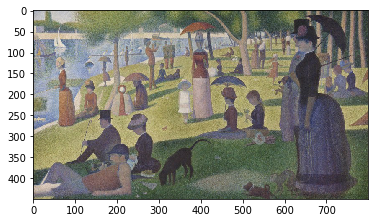

[('person',
  0.8619747161865234,
  (284.297607421875,
   125.42107391357422,
   32.32664108276367,
   124.38459777832031)),
 ('person',
  0.804358959197998,
  (134.0343017578125,
   386.536376953125,
   235.1654510498047,
   109.05921173095703)),
 ('person',
  0.7352283596992493,
  (546.4147338867188,
   100.2101821899414,
   19.630062103271484,
   55.3659782409668)),
 ('person',
  0.7054235935211182,
  (487.73016357421875,
   134.16610717773438,
   26.02413558959961,
   41.26131820678711)),
 ('person',
  0.6855552196502686,
  (133.82550048828125,
   217.99635314941406,
   46.94614028930664,
   88.59093475341797)),
 ('person',
  0.6843079924583435,
  (571.7789916992188,
   142.22486877441406,
   36.18492889404297,
   80.76060485839844)),
 ('person',
  0.661349356174469,
  (442.1662292480469, 135.1103973388672, 19.650768280029297, 43.22412109375)),
 ('person',
  0.5964694023132324,
  (266.6741943359375, 323.0479736328125, 76.3382339477539, 156.9385223388672)),
 ('person',
  0.570780396

In [4]:
%cd darknet
from darknet import performDetect, performDetectForImage
res = performDetect(imagePath=imagePath,showImage=False, thresh=0.25)
image = np.array(PIL.Image.open(imagePath))
#image = resize_image(image, (int(image.shape[0]/3), int(image.shape[1]/3)))
plt.imshow(image)
plt.show()
res


In [5]:

import torch
import torchvision
%cd ../3d-ken-burns
assert(int(str('').join(torch.__version__.split('.')[0:3])) >= 120) # requires at least pytorch version 1.2.0

torch.set_grad_enabled(False) # make sure to not compute gradients for computational performance

torch.backends.cudnn.enabled = True # make sure to use cudnn for computational performance

import base64
import cupy
import cv2
import flask
import getopt
import gevent
import gevent.pywsgi
import h5py
import io
import math
import moviepy
import moviepy.editor
import numpy
import os
import random
import re
import scipy
import scipy.io
import shutil
import sys
import tempfile
import time
import urllib
import zipfile

import PIL
import matplotlib.pyplot as plt
import numpy as np
import torch

def show_torch_image(x0, show=True, save=False, save_address=''):
        image=x0
        #image = (x0.clamp(-1, 1) + 1) / 2.0
        image = image.detach().squeeze(0).cpu().permute(1, 2, 0).numpy()
        image = np.uint8(image*255)  
        img = PIL.Image.fromarray(image, 'RGB')
        if show:
            plt.figure(figsize=(15, 6))
            plt.imshow(np.asarray(img))
            plt.show()
        if save:
            img.save(save_address)
        return image
            
            
def show_torch_gray_image(x0, show=True, save=False, save_address=''):
        n = x0.shape[2]
        m = x0.shape[3]
        image = (x0.clamp(-1, 1) + 1) / 2.0
        image = image.detach().squeeze(0).cpu().numpy().reshape(n,m)
        image = np.uint8(image*255)  
        img = PIL.Image.fromarray(image, 'L')
        if show:
            plt.figure(figsize=(15, 6))
            plt.imshow(np.asarray(img))
            plt.show()
        if save:
            img.save(save_address)
            %cd ../3d-ken-burns/
#exec(open('./common.py', 'r').read())

exec(open('./models/disparity-estimation.py', 'r').read())
exec(open('./models/disparity-adjustment.py', 'r').read())
exec(open('./models/disparity-refinement.py', 'r').read())
exec(open('./models/pointcloud-inpainting.py', 'r').read())
def estimDepth(imagePath):
    numpyImage = np.array(PIL.Image.open(imagePath))

    dblFocal = max(numpyImage.shape[0], numpyImage.shape[1]) / 2.0
    dblBaseline = 40.0

    tensorImage = torch.FloatTensor(numpyImage.transpose(2, 0, 1)).unsqueeze(0).cuda() / 255.0
    show_torch_image(tensorImage)
    tensorDisparity = disparity_estimation(tensorImage)
    tensorDisparity = disparity_refinement(torch.nn.functional.interpolate(input=tensorImage, size=(tensorDisparity.size(2) * 4, tensorDisparity.size(3) * 4), mode='bilinear', align_corners=False), tensorDisparity)
    tensorDisparity = torch.nn.functional.interpolate(input=tensorDisparity, size=(tensorImage.size(2), tensorImage.size(3)), mode='bilinear', align_corners=False) * (max(tensorImage.size(2), tensorImage.size(3)) / 256.0)
    tensorDepth = (dblFocal * dblBaseline) / (tensorDisparity + 0.0000001)
    #show_torch_gray_image(tensorDepth/2000)
    #show_torch_gray_image(tensorDisparity/(dblBaseline*20.0))
    numpyDisparity = tensorDisparity[0, 0, :, :].cpu().numpy()
    numpyDepth = tensorDepth[0, 0, :, :].cpu().numpy()
    return numpyDepth

/home/mariia/Desktop/google/3d-ken-burns


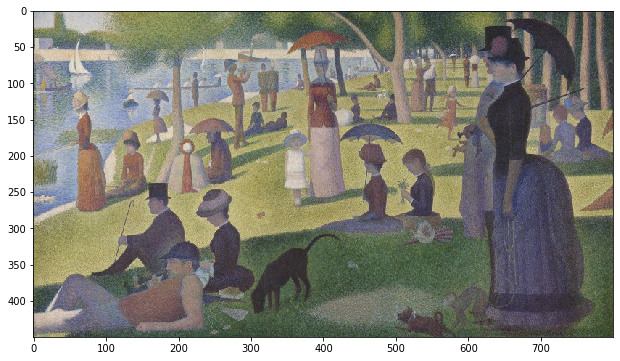

In [6]:
depthMap = estimDepth(imagePath)
detections = resToDetections(res, depthMap)

In [7]:
detections

[nclass : person,
 confidence : 0.861975,
 bbox :[x : 63.228775, y : 268.134287, w : 124.000000, h : 32.000000],
 depth : 869.167908
 , nclass : person,
 confidence : 0.804359,
 bbox :[x : 332.006771, y : 16.451576, w : 109.000000, h : 235.000000],
 depth : 661.312195
 , nclass : person,
 confidence : 0.735228,
 bbox :[x : 72.527193, y : 536.599703, w : 55.000000, h : 19.000000],
 depth : 854.782654
 , nclass : person,
 confidence : 0.705424,
 bbox :[x : 113.535448, y : 474.718096, w : 41.000000, h : 26.000000],
 depth : 855.769470
 , nclass : person,
 confidence : 0.685555,
 bbox :[x : 173.700886, y : 110.352430, w : 88.000000, h : 46.000000],
 depth : 847.439697
 , nclass : person,
 confidence : 0.684308,
 bbox :[x : 101.844566, y : 553.686527, w : 80.000000, h : 36.000000],
 depth : 854.038086
 , nclass : person,
 confidence : 0.661349,
 bbox :[x : 113.498337, y : 432.340845, w : 43.000000, h : 19.000000],
 depth : 843.576355
 , nclass : person,
 confidence : 0.596469,
 bbox :[x : 2

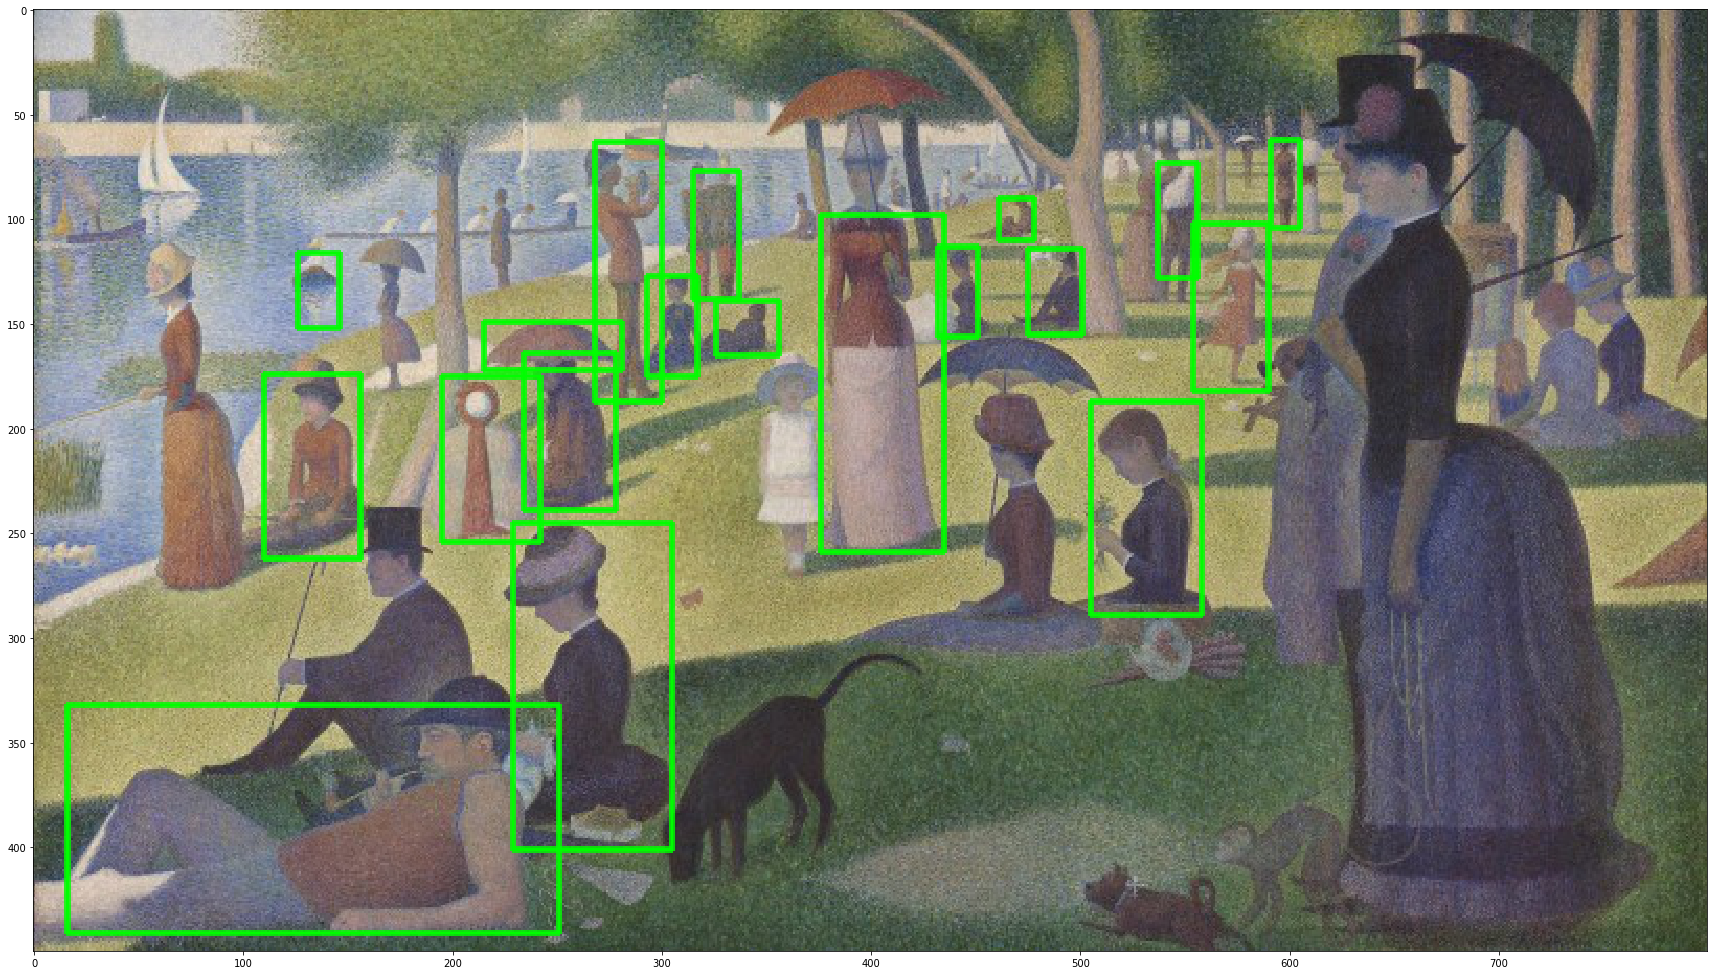

In [8]:
plt.figure(figsize=(30,30))
plt.imshow(putDetections(image, detections))

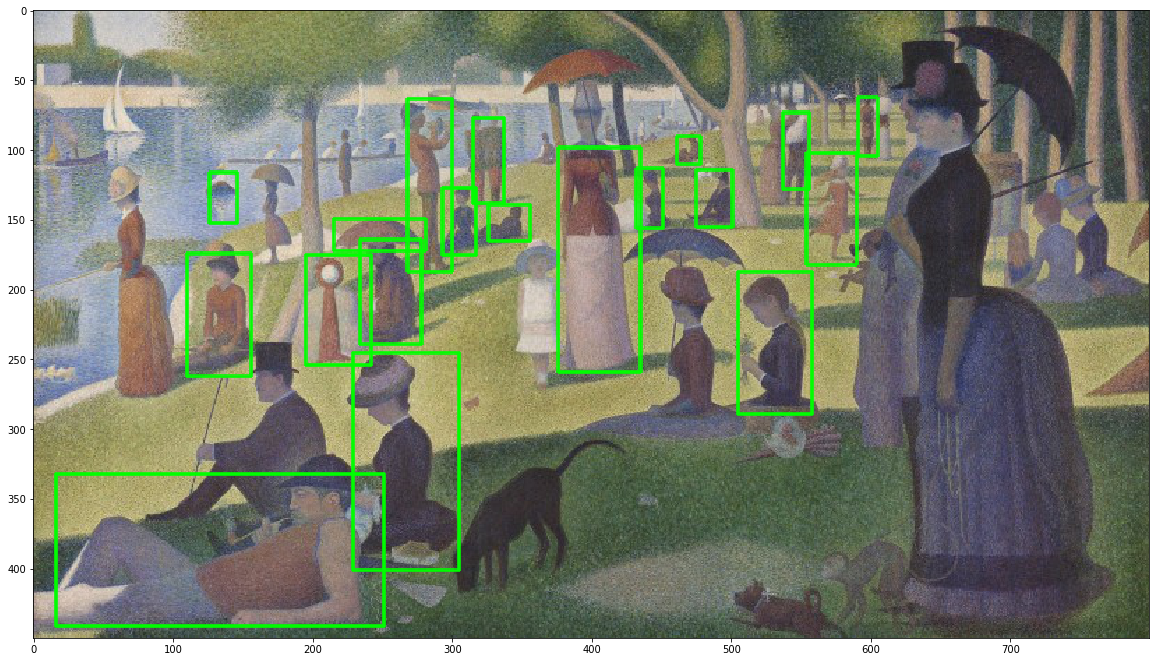

Cleaning overlapping boxes...
Number of boxes reduced from 19 to 15
15


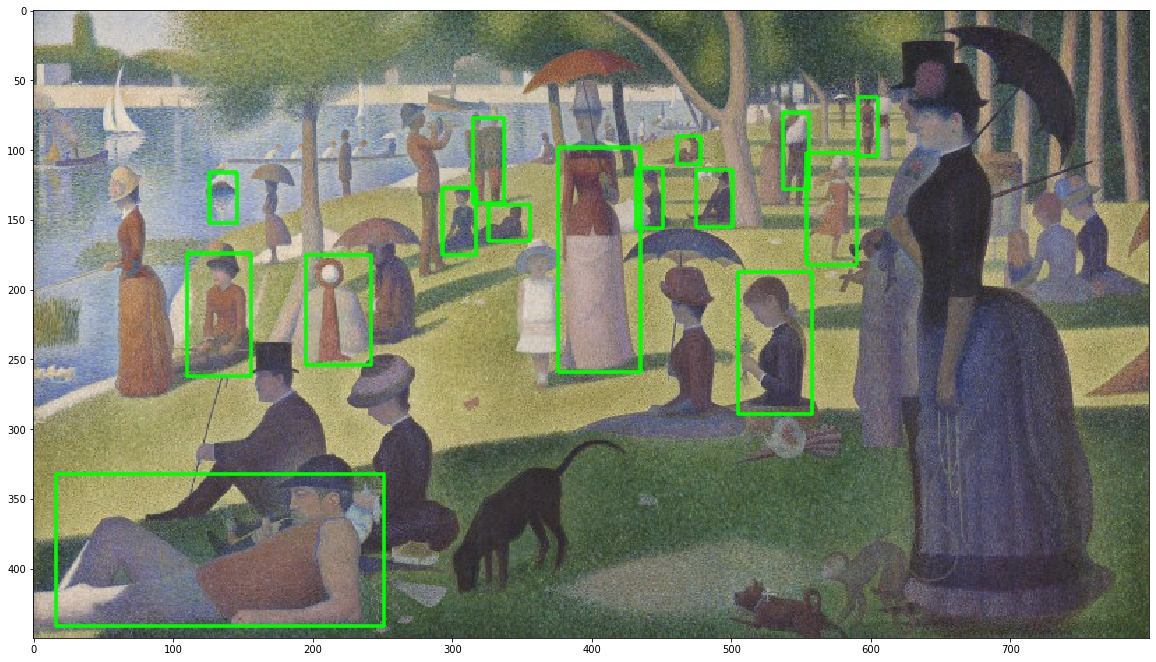

Scaling clusters according to the scores forming custom.shape...
41
150
95
150
109
150
62
150
70
150
107
150
102
150
89
150
130
150
161
108
150
124
150
114
150
48
150
71
150
312.0067710876465
312.0067710876465
25.527193069458008
25.527193069458008
59.53544807434082
59.53544807434082
142.70088577270508
142.70088577270508
66.84456634521484
66.84456634521484
60.49833679199219
60.49833679199219
76.04269981384277
76.04269981384277
33.470699310302734
33.470699310302734
25.12605571746826
25.12605571746826
97.87625885009766
97.87625885009766
7.934980392456055
7.934980392456055
77.12765598297119
77.12765598297119
58.92946243286133
58.92946243286133
162.9615936279297
162.9615936279297
139.846435546875
139.846435546875


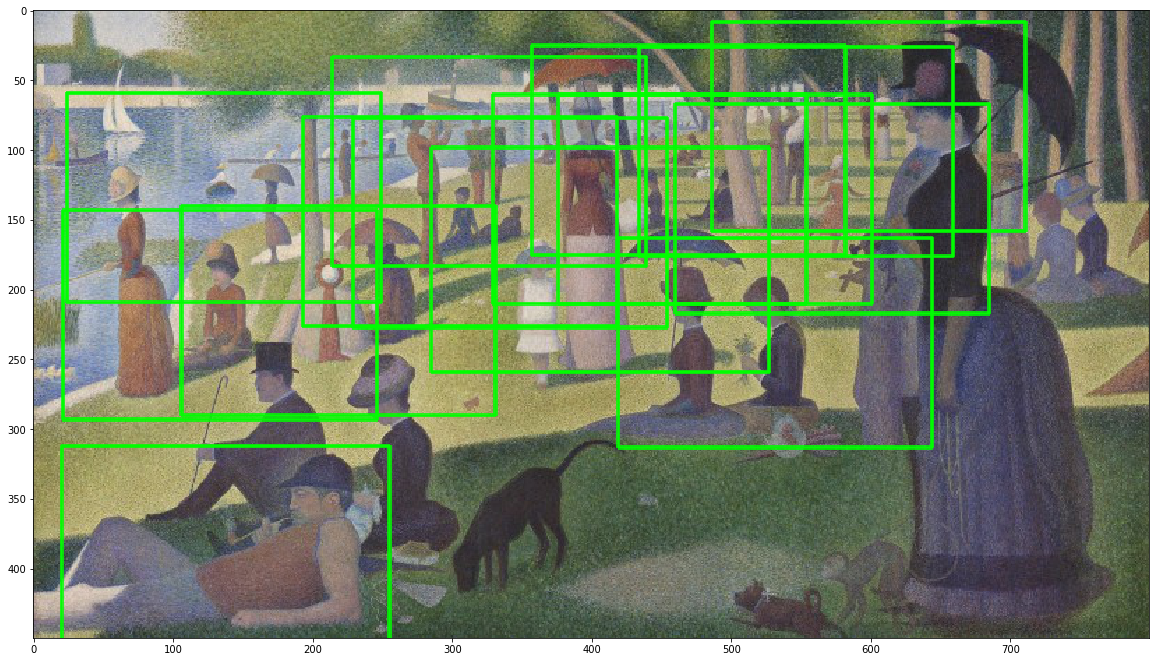

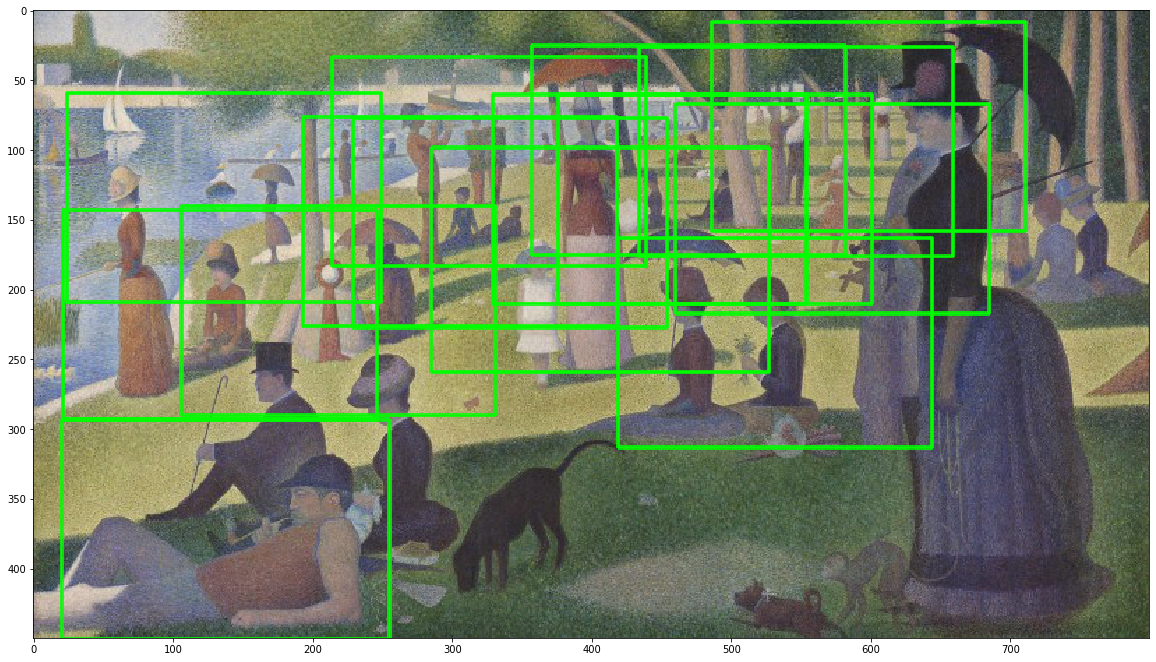

<Figure size 1440x1440 with 0 Axes>

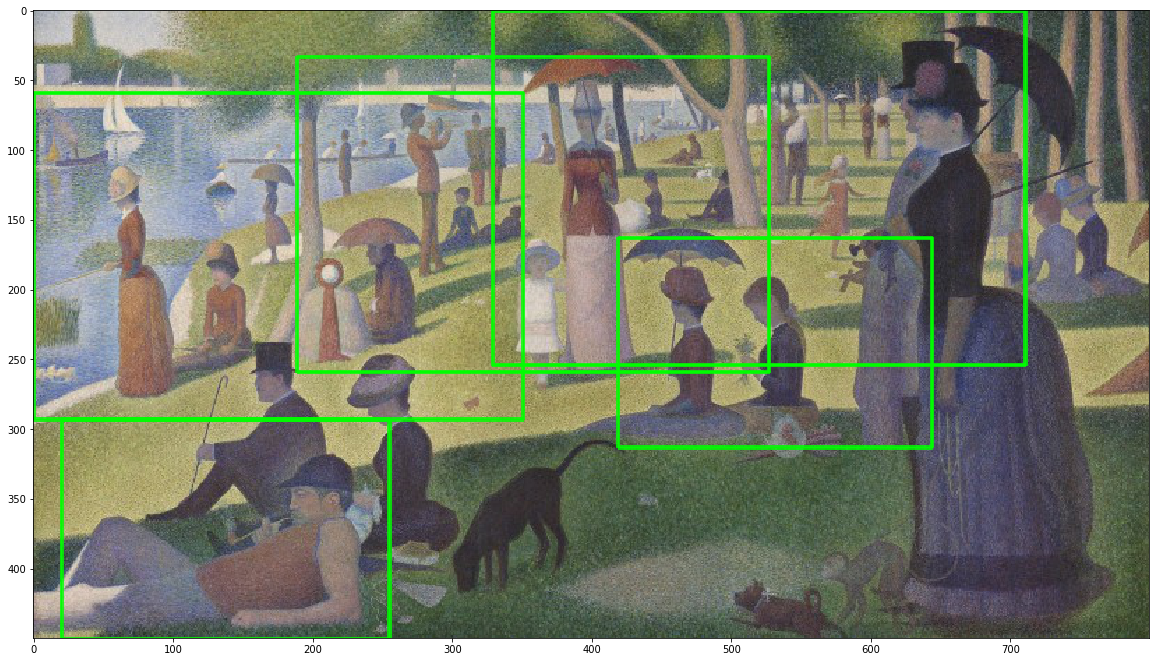

Cleaning overlapping boxes...
Number of boxes reduced from 5 to 5
5
0
1
2
3
zoom
(450, 800, 3)
600.0
900
(900, 1600, 3)
create_frames_fading_patch
create_frames_fading_patch
lines
else
linear
[x : 0.000000, y : 329.340845, w : 254.134715, h : 381.202073]
[x : 7.934980, y : 485.542918, w : 150.000000, h : 225.000000]
(450, 800, 3)
1200
1800
(1800, 3200, 3)
linear
[x : 7.934980, y : 485.542918, w : 150.000000, h : 225.000000]
[x : 60.498337, y : 329.340845, w : 150.000000, h : 225.000000]
(450, 800, 3)
1200
1800
(1800, 3200, 3)
create_frames_fading_patch
create_frames_fading_patch
lines
if
if latest_box.dist_centers(cur_box) < threshold and not first:
linear
[x : 58.929462, y : 0.000000, w : 233.771423, h : 350.657135]
[x : 162.961594, y : 418.574566, w : 150.000000, h : 225.000000]
(450, 800, 3)
1200
1800
(1800, 3200, 3)
lines
if
>0
for
[x : 162.961594, y : 418.574566, w : 150.000000, h : 225.000000]


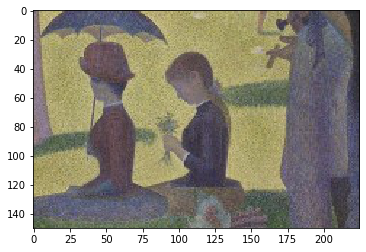

if latest_box.dist_centers(cur_box) < threshold and not first:
linear
[x : 162.961594, y : 418.574566, w : 150.000000, h : 225.000000]
[x : 33.470699, y : 188.500923, w : 225.405560, h : 338.108339]
(450, 800, 3)
1200
1800
(1800, 3200, 3)
lines
else
linear
[x : 33.470699, y : 188.500923, w : 225.405560, h : 338.108339]
[x : 76.042700, y : 193.251871, w : 150.000000, h : 225.000000]
(450, 800, 3)
1200
1800
(1800, 3200, 3)
linear
[x : 76.042700, y : 193.251871, w : 150.000000, h : 225.000000]
[x : 97.876259, y : 285.109262, w : 161.000000, h : 241.500000]
(450, 800, 3)
1200
1800
(1800, 3200, 3)
[x : 0.000000, y : 0.000000, w : 450.000000, h : 800.000000]
[x : 97.876259, y : 285.109262, w : 161.000000, h : 241.500000]
zoom
(450, 800, 3)
600.0
900
(900, 1600, 3)


t:   0%|          | 3/3088 [00:00<02:02, 25.21it/s, now=None]

Moviepy - Building video my10.mp4.
Moviepy - Writing video my10.mp4



Moviepy - Done !
Moviepy - video ready my10.mp4


In [9]:
img = image
verbose=True
if verbose:
    plt.figure(figsize=(20,20))
    plt.imshow(putDetections(img, detections))
    plt.show()
cleanRepeats(detections)
if verbose:
    plt.figure(figsize=(20,20))
    plt.imshow(putDetections(img, detections))
    plt.show()
detections, h_means, w_means, labels = scaleAreaCLustersWithCustomShape(detections, img.shape, k, w//2)


if verbose:
    plt.figure(figsize=(20,20))
    plt.imshow(putDetections(img, detections))
    plt.show()
    plt.figure(figsize=(20,20))
    plt.imshow(putDetections(img, detections, True, True))
    plt.show()
cluster_labels, cluster_boxes = order_show(detections, img.shape, k, min_zoom=12)

if verbose:
    plt.figure(figsize=(20,20))
    plt.imshow(putDetections(img, cluster_boxes, True, False))
    plt.show()
cleanRepeatsBoxes(cluster_boxes)

in_points, out_points, in_detections, out_detections, lines = lines_in_clusters(img, detections, cluster_labels, True)

paintingClusterBoxes = []
for i in range(len(cluster_boxes)):
    paintingClusterBox = paintingClusters(cluster_boxes[i], in_points[i], 
                     out_points[i], in_detections[i], out_detections[i], lines[i])
    paintingClusterBoxes.append(paintingClusterBox)
path = shortestPath(paintingClusterBoxes)
random.shuffle(path)

cluster_boxes = sorted(cluster_boxes, key=lambda b : [b.x, b.y])
frames = make_path_clusters0(img,detections, cluster_boxes, cluster_labels, 
                             in_points, out_points, in_detections, out_detections, lines, path, w = w, k = k)   

pil_frames = []
for i in range(len(frames)):
    fr = frames[i]
    fr = np.uint8(fr)
    frames[i] = fr
    pil_frames.append(PIL.Image.fromarray(fr))
try:
    clip = mpy.ImageSequenceClip(frames[20:], fps=30)
    clip.write_videofile('my10.mp4', fps=30)
except:
    print("An error occured while saving an mp4.")    
try:
    pil_frames[0].save('my10.gif', save_all=True, append_images = pil_frames[1:], duration=30)
except:
    print("An error occured while saving a gif.")
    
